In [44]:
import numpy as np
import pandas as pd 
import matplotlib as plt
%matplotlib inline

In [45]:
data = pd.read_csv('E:\\Programming\\python\\data\\Housing.csv')
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [46]:
df = pd.DataFrame(data)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [49]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## data cleaning

In [50]:
df = df.replace('yes', 1);
df = df.replace('no', 0);
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_8528\2638348287.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('no', 0);


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [51]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [52]:
df = df.replace('furnished', 1);
df = df.replace('semi-furnished', 2);
df = df.replace('unfurnished', 3);


C:\Users\Admin\AppData\Local\Temp\ipykernel_8528\2522843687.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('unfurnished', 3);


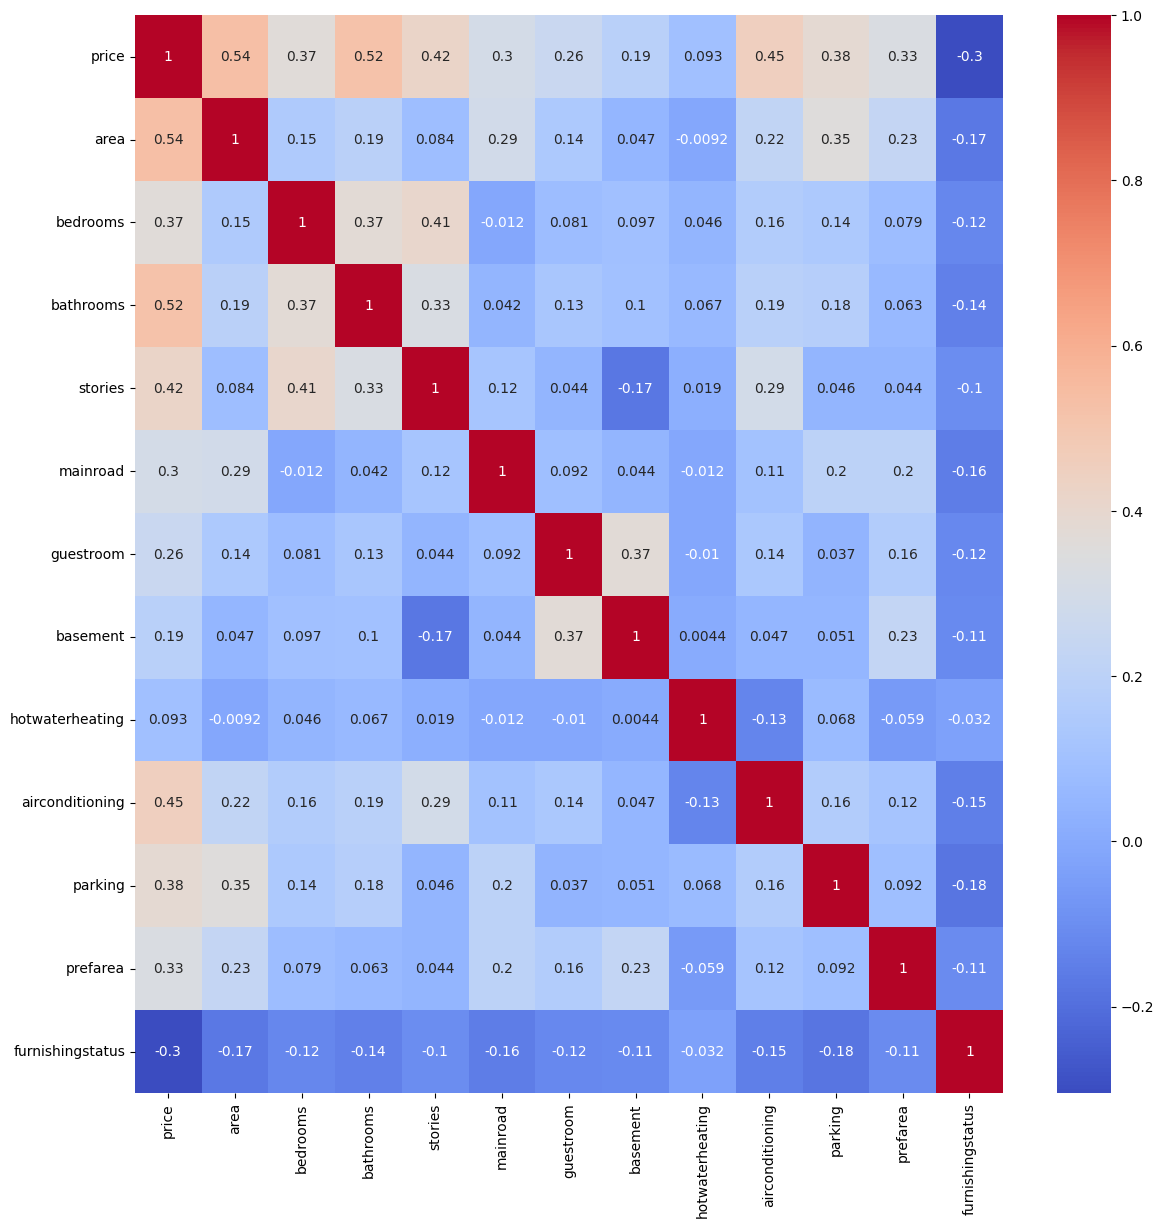

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 14))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

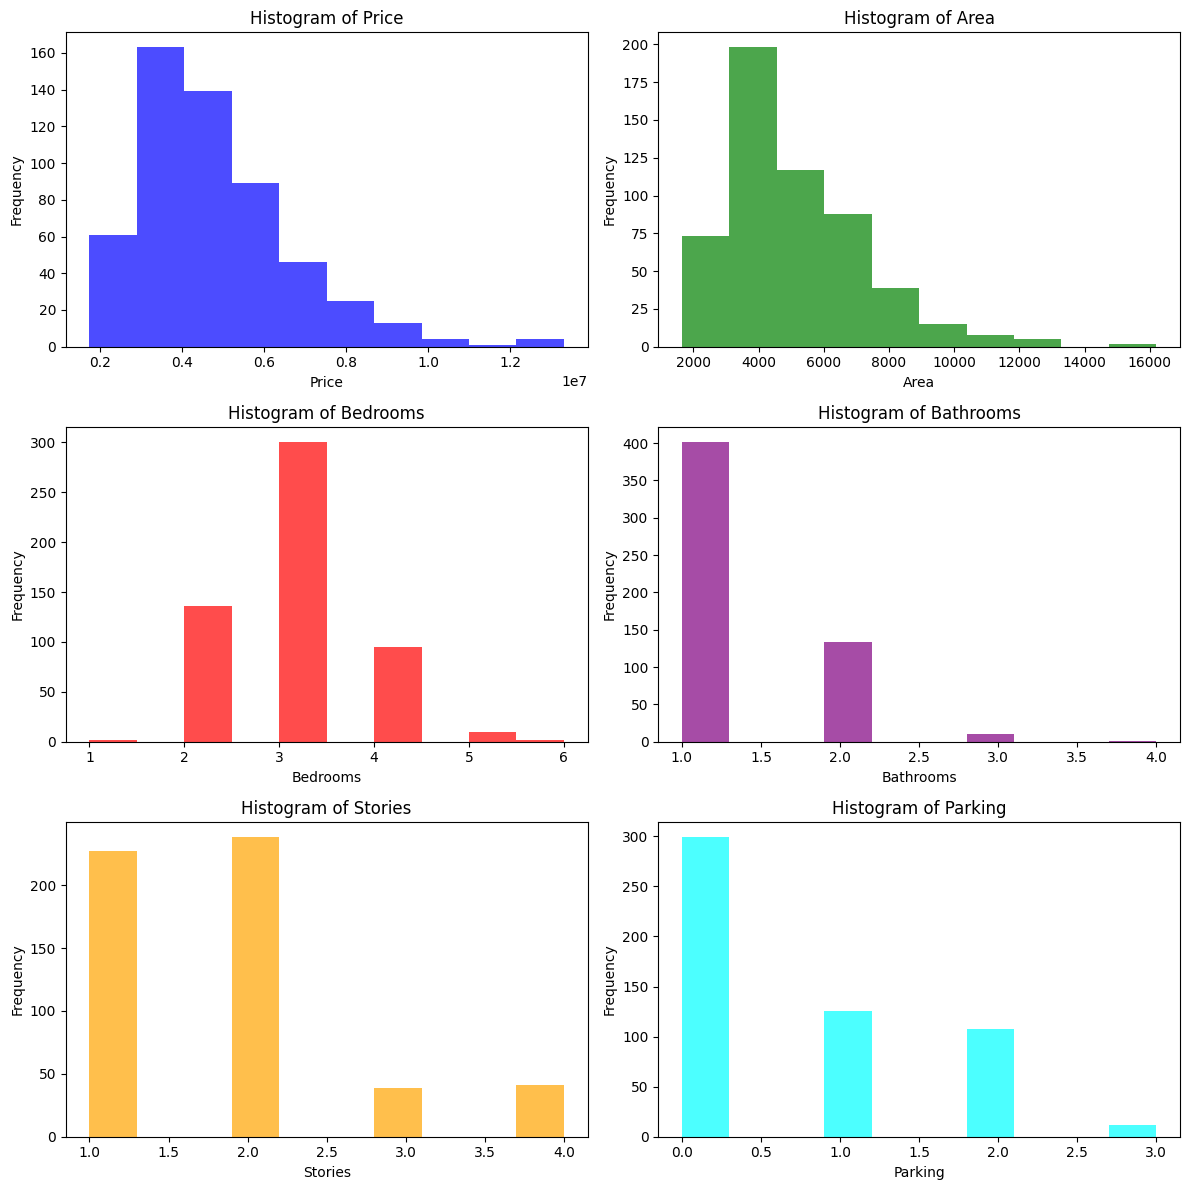

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the numerical features
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    axs[row, col].hist(df[feature], bins=10, color=colors[i], alpha=0.7)
    axs[row, col].set_title(f'Histogram of {feature.capitalize()}')
    axs[row, col].set_xlabel(feature.capitalize())
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# one hot - encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')

oheData = ohe.fit_transform(df[['furnishingstatus']])
oheData

,furnishingstatus_1,furnishingstatus_2,furnishingstatus_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
540,0.0,0.0,1.0
541,0.0,1.0,0.0
542,0.0,0.0,1.0
543,1.0,0.0,0.0


In [ ]:
test = df.copy()
test = pd.concat([test, oheData], axis=1).drop(columns=['furnishingstatus'])
df = test

## spliting data to X and y

In [ ]:
y = df["price"]
X = df.drop(columns = ['price'])
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_1,furnishingstatus_2,furnishingstatus_3
0,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,9960,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0
3,7500,4,2,2,1,0,1,0,1,3,1,1.0,0.0,0.0
4,7420,4,1,2,1,1,1,0,1,2,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0.0,0.0,1.0
541,2400,3,1,1,0,0,0,0,0,0,0,0.0,1.0,0.0
542,3620,2,1,1,1,0,0,0,0,0,0,0.0,0.0,1.0
543,2910,3,1,1,0,0,0,0,0,0,0,1.0,0.0,0.0


## spliting train data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## training model 

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
regression.coef_


array([ 550762.64317168,   60813.4371982 ,  528860.12634351,
        359569.57150531,  140091.96650564,  107358.98663031,
        231590.48273824,  137463.98715129,  319283.72367264,
        253425.41739941,  216284.0140147 ,   76512.93745907,
         25851.44926348, -100468.61892979])

In [ ]:
y_pred = regression.predict(X_test)
print(y_pred)

[5372312.6161464  7069241.00525806 3099290.78784024 4526446.61703975
 3281573.61192656 3589455.18752547 5728625.30074515 6422877.52476236
 2797870.49568591 2554357.99210552 9693560.19894656 2802903.76131031
 3026465.95300837 3433891.33202093 3792786.34565513 5321204.36478555
 2999852.37322994 4813306.52790376 4572077.61633938 3595733.80237382
 5605701.03333099 5838934.41614981 2730716.89440109 4837741.37096247
 5638460.49223856 7809681.30410653 3347443.37529208 5328750.6625753
 8323072.83237386 3374792.28854335 6379706.15324899 3397999.89564253
 6709115.82334019 4249666.18392567 3594972.20315591 5842994.13027721
 5115480.11172668 4359421.90319848 3046570.15372424 4597379.56416965
 4784358.17589609 3411743.7822068  7048978.02507302 4062741.36892573
 3785699.24160861 4286017.77250844 6729020.2073964  4133428.23821411
 3845434.09183082 3655159.46220358 7439302.79944483 2869444.70398564
 4468816.13830399 4474332.83085885 3790094.69366283 2607548.31509126
 7484173.67473394 2912521.83764142 

# r2 score

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6463350878895879

In [ ]:
test = np.array([4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0])
# a = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
X = np.reshape(test ,(1, test.size))
# a = np.reshape(a ,(1, test.size))
X = scaler.transform(X);
# regression.predict(X)
regression.predict(X)

e:\Programming\python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4762406.27296588])